# Tri Data OpenFoodFacts

## Installation & Import

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
import matplotlib.pyplot as plt

## Création du DataFrame de base

In [5]:
data = pd.read_csv("openfoodfacts.csv", sep="\t", low_memory=False)

In [6]:
# Le séparateur est "\t"

In [7]:
# Low_memory = False : explication

In [8]:
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Copie de la data de base

In [10]:
data_exo = data
data_exo 

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Les "Créators"

In [11]:
creator = data_exo['creator'].value_counts()
duplicated_creator = creator[creator>1]
duplicated_creator

creator
usda-ndb-import               169868
openfoodfacts-contributors     40117
kiliweb                        13891
date-limite-app                11918
openfood-ch-import             11478
                               ...  
neuro6                             2
luciehope                          2
manutrition                        2
ddespinoy                          2
paddy78                            2
Name: count, Length: 1898, dtype: int64

### Les "Products"

#### Product name ou generic name nul

In [12]:
product_null = data_exo[data_exo['product_name'].isnull() & data_exo['generic_name'].isnull()]
product_null

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
48,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0000007020254,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,1420150193,2015-01-01T22:09:53Z,1420210373,2015-01-02T14:52:53Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,0000050157846,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,1482847730,2016-12-27T14:08:50Z,1482847738,2016-12-27T14:08:58Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,0000069105241,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1466933518,2016-06-26T09:31:58Z,1466933519,2016-06-26T09:31:59Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,0000140000083,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1454609493,2016-02-04T18:11:33Z,1454621727,2016-02-04T21:35:27Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320747,9800895250,http://world-fr.openfoodfacts.org/produit/9800...,tacite-mass-editor,1490554697,2017-03-26T18:58:17Z,1490554697,2017-03-26T18:58:17Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320748,9802735,http://world-fr.openfoodfacts.org/produit/9802735,date-limite-app,1472728165,2016-09-01T11:09:25Z,1472728167,2016-09-01T11:09:27Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320752,98709870987,http://world-fr.openfoodfacts.org/produit/9870...,openfoodfacts-contributors,1472254210,2016-08-26T23:30:10Z,1474729393,2016-09-24T15:03:13Z,NaN,NaN,33cl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320755,988639,http://world-fr.openfoodfacts.org/produit/988639,tacite-mass-editor,1490554698,2017-03-26T18:58:18Z,1490554698,2017-03-26T18:58:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data_exo.drop(product_null.index, inplace=True)

In [14]:
nb_lines = data_exo.shape[0]
print('Le nombre de lignes restant après suppression des produits sans nom est :', nb_lines)

Le nombre de lignes restant après suppression des produits sans nom est : 303129


### Les "Codes"

In [15]:
# Visualisation des codes "vide"

In [16]:
code_null = data_exo[data_exo['code'].isnull()]

In [17]:
data_exo.drop(code_null.index, inplace=True)

In [18]:
nb_lines = data_exo.shape[0]
print('Le nombre de lignes restant après suppression des codes nuls est :', nb_lines)

Le nombre de lignes restant après suppression des codes nuls est : 303106


### Les "Dates"

In [19]:
data_exo['last_modified_datetime'] = pd.to_datetime(data_exo['last_modified_datetime'])

In [20]:
data_exo['last_modified_datetime'] = data_exo['last_modified_datetime'].dt.date

In [21]:
data_exo['last_modified_datetime']

0         2016-09-17
1         2017-03-09
2         2017-03-09
3         2017-03-09
4         2017-03-09
             ...    
320767    2017-04-03
320768    2017-04-03
320769    2017-04-03
320770    2017-04-16
320771    2017-04-03
Name: last_modified_datetime, Length: 303106, dtype: object

In [22]:
# Compter le nombre de produits par date
date_counts = data_exo['last_modified_datetime'].value_counts().sort_index()

In [23]:
# Convertir les index en datetime pour le tracé
date_counts.index = pd.to_datetime(date_counts.index)

#### Création d'un diagramme pour voir les dates

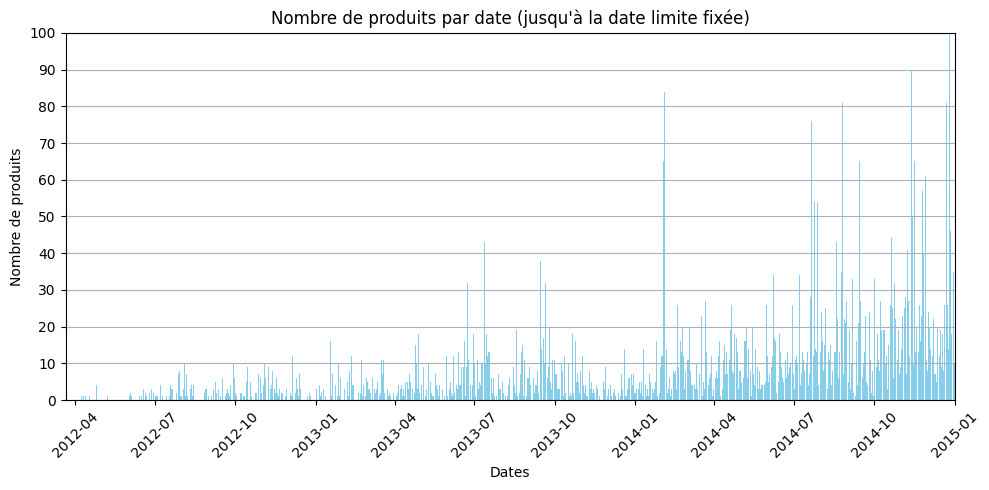

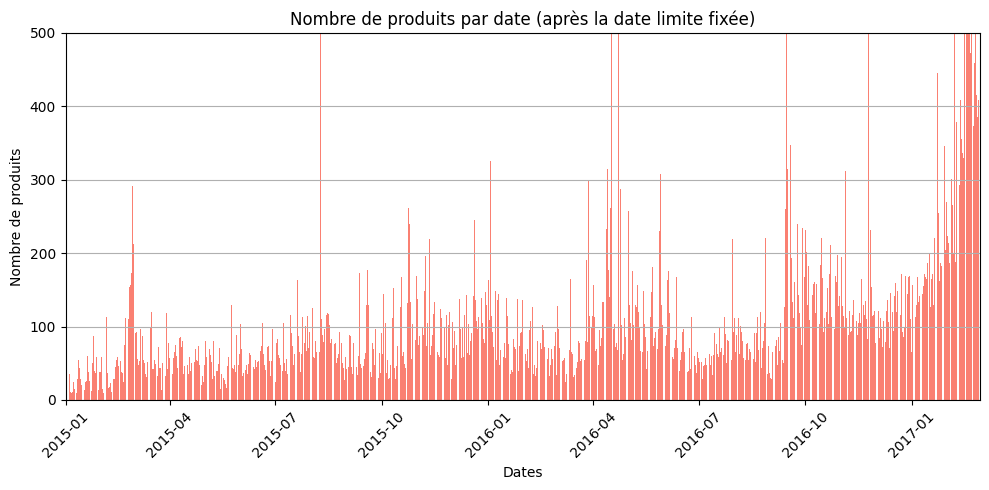

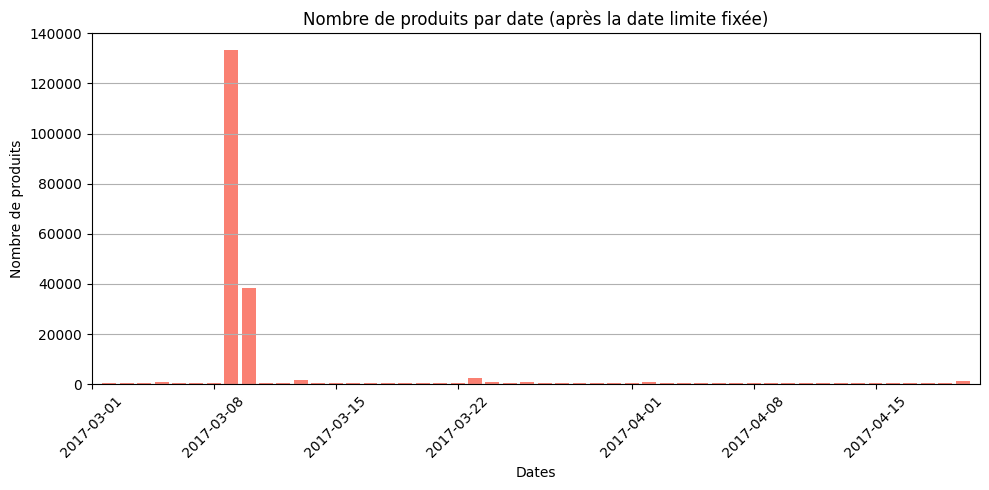

In [24]:

# Définir la date limite fixe
date_limit_1 = pd.to_datetime('2015-01-01')
# Définir la date limite fixe
date_limit_2 = pd.to_datetime('2017-03-01')

# Tracer le premier graphique (jusqu'à la date limite)
plt.figure(figsize=(10, 5))
plt.bar(date_counts.index[date_counts.index <= date_limit_1], date_counts.values[date_counts.index <= date_limit_1], color='skyblue')

# Fixer les limites de l'axe Y
max_y_value = 100 # Définir la valeur maximale de l'axe Y
plt.ylim(0, max_y_value)  # Appliquer la limite

# Ajuster les ticks de l'axe Y
plt.yticks(range(0, max_y_value + 10, 10))  # Définir l'intervalle des ticks de l'axe Y

# Définir les limites de l'axe X
plt.xlim(date_counts.index.min(), date_limit_1)

# Ajouter des labels et un titre
plt.xlabel('Dates')
plt.ylabel('Nombre de produits')
plt.title('Nombre de produits par date (jusqu\'à la date limite fixée)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tracer le deuxième graphique (après la date limite de 2015-01-01 jusqu'à 2017-01-01)
plt.figure(figsize=(10, 5))
plt.bar(date_counts.index[date_counts.index > date_limit_1], date_counts.values[date_counts.index > date_limit_1], color='salmon')

# Définir les limites de l'axe X
plt.xlim(date_limit_1, date_limit_2 )
# Fixer les limites de l'axe Y
max_y_value = 500 # Définir la valeur maximale de l'axe Y
plt.ylim(0, max_y_value)  # Appliquer la limite

# Ajuster les ticks de l'axe Y
plt.yticks(range(0, max_y_value + 100, 100))  # Définir l'intervalle des ticks de l'axe Y

# Ajouter des labels et un titre
plt.xlabel('Dates')
plt.ylabel('Nombre de produits')
plt.title('Nombre de produits par date (après la date limite fixée)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Tracer le troisième graphique (après la date limite de 2017-01-01)
plt.figure(figsize=(10, 5))
plt.bar(date_counts.index[date_counts.index > date_limit_2], date_counts.values[date_counts.index > date_limit_2], color='salmon')
# Définir les limites de l'axe X
plt.xlim(date_limit_2, date_counts.index.max())

# Ajouter des labels et un titre
plt.xlabel('Dates')
plt.ylabel('Nombre de produits')
plt.title('Nombre de produits par date (après la date limite fixée)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Calcul du nombres de produits entre chaque dates limites

In [25]:

# Convertir la colonne en type datetime
data_exo['last_modified_datetime'] = pd.to_datetime(data_exo['last_modified_datetime'])

# Extraire uniquement la date (sans heures, minutes et secondes)
data['date_only'] = data['last_modified_datetime'].dt.date

# Définir les limites de dates
date_limit_1 = pd.to_datetime('2015-01-01').date()
date_limit_2 = pd.to_datetime('2017-03-01').date()

# Compter le nombre de produits pour chaque plage de dates
nb_products_before_limit_1 = data_exo['date_only'][data_exo['date_only'] < date_limit_1].count()
nb_products_between_limits = data_exo['date_only'][(data_exo['date_only'] >= date_limit_1) & (data['date_only'] < date_limit_2)].count()
nb_products_after_limit_2 = data_exo['date_only'][data_exo['date_only'] >= date_limit_2].count()

# Afficher les résultats
print(f"Nombre de produits avant la date du 01/01/2015 : {nb_products_before_limit_1}")
print(f"Nombre de produits entre les dates du 01/01/2015 et 01/03/2017 : {nb_products_between_limits}")
print(f"Nombre de produits après la date du 01/03/2017 : {nb_products_after_limit_2}")

Nombre de produits avant la date du 01/01/2015 : 7540
Nombre de produits entre les dates du 01/01/2015 et 01/03/2017 : 94717
Nombre de produits après la date du 01/03/2017 : 200849


### Travail sur les "Products"

In [26]:
# Choisir le product_name pour lequel vous souhaitez calculer les statistiques
product_name = 'Ice Cream'

# Filtrer le DataFrame pour le product_name spécifié
filtered_data = data_exo[data_exo['product_name'] == product_name]

float_columns = data_exo.select_dtypes(include=['float64'])
# Calculer les statistiques
# Calculer les statistiques
statistics = {
    'min': float_columns.min(),
    'max': float_columns.max(),
    'mean': float_columns.mean(),
    'median': float_columns.median()
}

# Convertir le dictionnaire en DataFrame pour un affichage plus lisible
statistics_df = pd.DataFrame(statistics)
# Afficher les résultats
clean_data = statistics_df.dropna()
clean_data.head(90)

,min,max,mean,median
additives_n,0.0,31.0,1.937691,1.00
ingredients_from_palm_oil_n,0.0,2.0,0.018926,0.00
ingredients_that_may_be_from_palm_oil_n,0.0,6.0,0.055025,0.00
energy_100g,0.0,3251373.0,1140.498028,1100.00
energy-from-fat_100g,0.0,3830.0,579.323357,300.00
...,...,...,...,...
collagen-meat-protein-ratio_100g,8.0,25.0,15.414634,15.00
cocoa_100g,6.0,100.0,49.544221,50.00
carbon-footprint_100g,0.0,2842.0,341.700764,195.75
nutrition-score-fr_100g,-15.0,40.0,9.151662,10.00


In [27]:
# Liste des colonnes :
data_exo.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

#### Les doublons

In [28]:
products = data_exo['product_name'].value_counts()
duplicated_products = products[products>1]
duplicated_products

product_name
Ice Cream                  410
Extra Virgin Olive Oil     303
Potato Chips               281
Premium Ice Cream          226
Tomato Ketchup             182
                          ... 
6 merguez                    2
Haricots noirs               2
Kadoya, Pure Sesame Oil      2
Chocolat Blanc Coco          2
2 ficelles Picardes          2
Name: count, Length: 24431, dtype: int64

In [29]:
### Essayer de classer les doublons par date de modif pour voir ceux qu'on veut garder

In [36]:
data_time = data_exo.sort_values(by='last_modified_datetime')

In [42]:
data_exo = data_time.drop_duplicates(subset=['product_name'])
data_exo

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,date_only
249418,3700019510497,http://world-fr.openfoodfacts.org/produit/3700...,malikele,1332326417,2012-03-21T10:40:17Z,1332368132,2012-03-21,Attiéké,Couscous de manioc,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-21
202495,3229820781136,http://world-fr.openfoodfacts.org/produit/3229...,stephane,1333872532,2012-04-08T08:08:52Z,1333872755,2012-04-08,Poudre cristallisée à base de bouleau - Xylitol,NaN,200 g,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2012-04-08
252400,3760063335965,http://world-fr.openfoodfacts.org/produit/3760...,malikele,1334091151,2012-04-10T20:52:31Z,1334091465,2012-04-10,Sumac,Sumac,60 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-10
281470,56094381,http://world-fr.openfoodfacts.org/produit/5609...,malikele,1334348277,2012-04-13T20:17:57Z,1334348753,2012-04-13,Indian tonic,Tonic,33 cl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-13
112589,01922305,http://world-fr.openfoodfacts.org/produit/0192...,malikele,1334695616,2012-04-17T20:46:56Z,1334696008,2012-04-17,"Bonbons durs, cerise sauvage",Bonbons,32 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219572,3270160840656,http://world-fr.openfoodfacts.org/produit/3270...,boism,1492552314,2017-04-18T21:51:54Z,1492711871,2017-04-20,Pure Sélection Sorbet Le Cassis,Sorbet plein fruit cassis,"500 ml, 380 g",...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,2017-04-20
230691,3396410047559,http://world-fr.openfoodfacts.org/produit/3396...,kiliweb,1485783079,2017-01-30T13:31:19Z,1492736021,2017-04-21,Chocolat Noir Costa Rica 75% De Cacao,NaN,70 g,...,NaN,NaN,75.0,NaN,NaN,22.0,22.0,NaN,NaN,2017-04-21
258724,4008102000054,http://world-fr.openfoodfacts.org/produit/4008...,openfoodfacts-contributors,1428759162,2015-04-11T13:32:42Z,1492734933,2017-04-21,Edulcorant Liquide,Edulcorant de table à base de cyclamate de sod...,200 ml,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,2017-04-21
197554,3175681852020,http://world-fr.openfoodfacts.org/produit/3175...,openfoodfacts-contributors,1492732754,2017-04-20T23:59:14Z,1492733042,2017-04-21,Gerlinéa Repas Minceur Complet,NaN,4 repas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-21


In [43]:
nb_lines = data_exo.shape[0]
print('Le nombre de lignes restant après suppression des doublons produits les plus anciens est :', nb_lines)

Le nombre de lignes restant après suppression des doublons produits les plus anciens est : 221344


#### Taux de remplissage des colonnes

In [44]:
# trouvé par chatGPT
# Créer un dictionnaire pour stocker le taux de remplissage de chaque colonne
fill_rate_dict = {}

# Boucle sur toutes les colonnes du DataFrame
for col in data_exo.columns:
    # Calcul du taux de remplissage pour chaque colonne
    fill_rate = data_exo[col].notna().sum() / len(data_exo) * 100
    # Ajouter le résultat dans le dictionnaire
    fill_rate_dict[col] = fill_rate

# Afficher les taux de remplissage pour toutes les colonnes
for col, rate in fill_rate_dict.items():
    print(f"Taux de remplissage de la colonne '{col}': {rate:.2f}%")


Taux de remplissage de la colonne 'code': 100.00%
Taux de remplissage de la colonne 'url': 100.00%
Taux de remplissage de la colonne 'creator': 100.00%
Taux de remplissage de la colonne 'created_t': 100.00%
Taux de remplissage de la colonne 'created_datetime': 100.00%
Taux de remplissage de la colonne 'last_modified_t': 100.00%
Taux de remplissage de la colonne 'last_modified_datetime': 100.00%
Taux de remplissage de la colonne 'product_name': 100.00%
Taux de remplissage de la colonne 'generic_name': 19.70%
Taux de remplissage de la colonne 'quantity': 38.08%
Taux de remplissage de la colonne 'packaging': 28.65%
Taux de remplissage de la colonne 'packaging_tags': 28.65%
Taux de remplissage de la colonne 'brands': 95.17%
Taux de remplissage de la colonne 'brands_tags': 95.17%
Taux de remplissage de la colonne 'categories': 30.19%
Taux de remplissage de la colonne 'categories_tags': 30.19%
Taux de remplissage de la colonne 'categories_fr': 30.19%
Taux de remplissage de la colonne 'origin

In [56]:
# Liste des colonnes à supprimer
cols_to_delete = [col for col, rate in fill_rate_dict.items() if rate < 50]
# Afficher les noms des colonnes à supprimer
print("Colonnes à supprimer (taux de remplissage < 50%) :", cols_to_delete)

Colonnes à supprimer (taux de remplissage < 50%) : ['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'traces', 'traces_tags', 'traces_fr', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'alcohol_100g', 'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'folates_100g', 'vitamin-b12_100g', 'pantothenic-acid_100g', 'potassium_100g', 'calcium_100